# Demo Networkx y pyvis

En esta demo se explorará la librería [networkx](https://networkx.org/) para la confección visual de grafos estáticos. Luego, se verá la librería [pyvis](https://pyvis.readthedocs.io/en/latest/index.html) para generar visualizaciones más dinámicas.

El primer paso será importar las librerías necesarias

In [ ]:
import requests
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

Luego descargamos el [zip](https://drive.google.com/file/d/1UW4jHNyu5MvycxWF8ap18IevLMGdVGYv/view?usp=share_link) con los datos a utilizar en esta demo. El zip contiene:
- **lort.csv**: grafo de interacción de personajes en El Señor de los Anillos.
- **NetworkOfThrones.csv**: grafo de interacción de personajes en Juegos de Tronos.
- **facebook.txt.gz**: grafo de amistad de usuarios anonimizado.

In [ ]:
def download_file_without_authenticate(id, destination):
    def get_confirm_token(response):
        for key, value in response.cookies.items():
            if key.startswith("download_warning"):
                return value

    URL = "https://docs.google.com/uc?export=download"
    response = requests.get(URL, params={"id": id, "confirm": 1}, stream=True)

    CHUNK_SIZE = 32768
    with open(destination, "wb") as f:
        for i, chunk in enumerate(response.iter_content(CHUNK_SIZE)):
            if chunk:  # filter out keep-alive new chunks
                f.write(chunk)

    return None

download_file_without_authenticate("1UW4jHNyu5MvycxWF8ap18IevLMGdVGYv", "DemoNetworks-Pyvis.zip")
!unzip -o -q DemoNetworks-Pyvis.zip
!ls

DemoNetworks-Pyvis.zip	lotr.csv	      sample_data
facebook.txt.gz		NetworkOfThrones.csv


# Networkx

## Creación de grafo manualmente

Existen diversas formas de ir creando un grafo en esta librería. Esta puede ser:
- con `add_node` para añadir un nodo.
- con `add_nodes_from` para añadir un conjunto de nodos. Puede ser una lista de nodos o puede ser otro objeto tipo `Graph`.
- con `add_edge` para añadir enlaces y si los nodos no existen, los creará.
- con `add_edge_from` para añadir un conjunto de enlaces y si los nodos no existen, los creará.

In [ ]:
grafo_1= nx.Graph()
grafo_1.add_node("A")
grafo_1.add_nodes_from(["B", "B2"])
grafo_1.add_edge("A", "B2")
grafo_1.add_edge("A", "C") # Cómo no existe "C", creará ese nodo

grafo_2 = nx.Graph()
grafo_2.add_edges_from([("G1", "G2"), ("G2", "G3")])

grafo_1.add_nodes_from(grafo_2)

Luego, para dibujar solo basta utilizar el método `draw`. Algunas opciones que uno puede personalizar son: el color del nodo, el tamaño de este, si los nombres de los nodos estarán _bold_, si mostrar el nombre de los nodos, entre otros.

Más información sobre dibujar nodos en [este enlace](https://networkx.org/documentation/stable/reference/drawing.html).

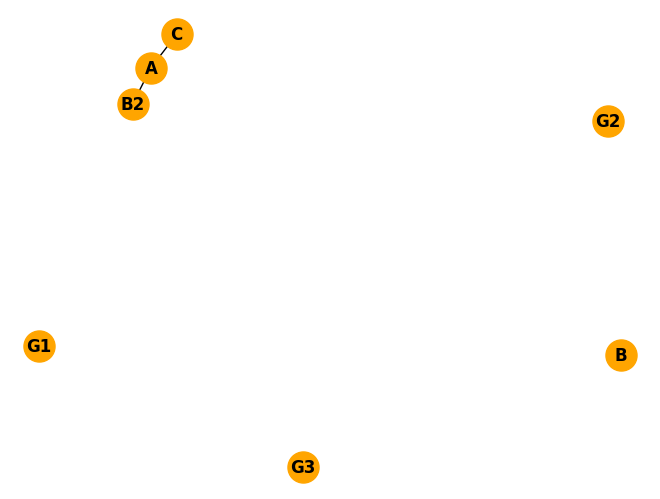

In [ ]:
options = {
    'node_color': 'orange',
    'node_size': 500,
}

nx.draw(grafo_1, with_labels=True, font_weight='bold', **options)

¿Por qué no se ven los enlaces entre G1, G2 y G3? Esto es porque solo añadimos los nodos de `grafo_2` en `grafo_1`. Ahora vamos a usar `add_edges_from` para agregar los enlaces.

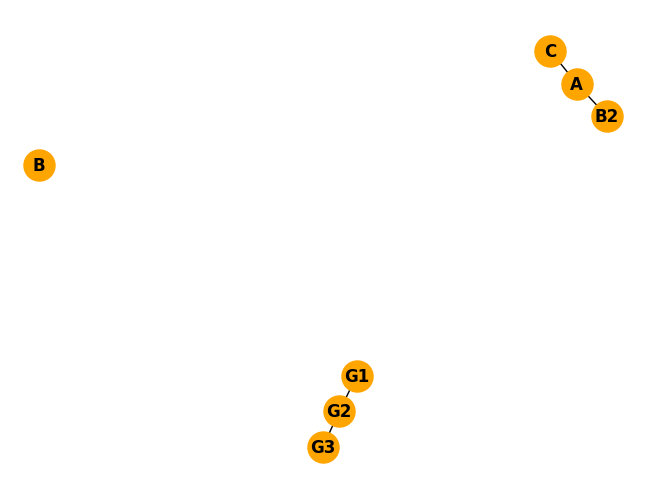

In [ ]:
grafo_1.add_edges_from(grafo_2.edges)
nx.draw(grafo_1, with_labels=True, font_weight='bold', **options)

### Dispociciones de grafos

La forma de posicionar los enlaces es muy importante al momento de visualizar un grafo. Para esto, muchas veces es necesario probar con diferentes "layout" cómo: _random_, _circular_, _spectral_, _shell_, entre otros. En [este enlace](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout) puedes encontrar diferentes "layout" para experimentar.

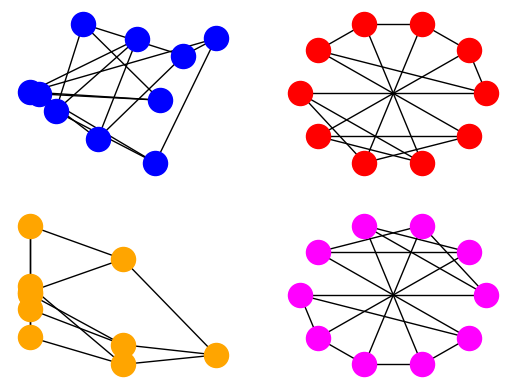

In [ ]:
G = nx.petersen_graph()

plt.subplot(221)
nx.draw_random(G, node_color="blue")

plt.subplot(222)
nx.draw_circular(G, node_color="red")

plt.subplot(223)
nx.draw_spectral(G, node_color="orange")

plt.subplot(224)
nx.draw_shell(G, node_color="magenta")

plt.show()

### Agregar pesos al grafo

También es posible dibujar grafos con pesos, para eso uno usa el método `add_weighted_edges_from` y le entrega una lista de tripletas. Cada tripleta tiene el nodo de origen, nodo destino y el peso. Además, si queremos que el grafo sea **direccional**, entonces hay que hacer un `DiGraph` y no un `Graph`.


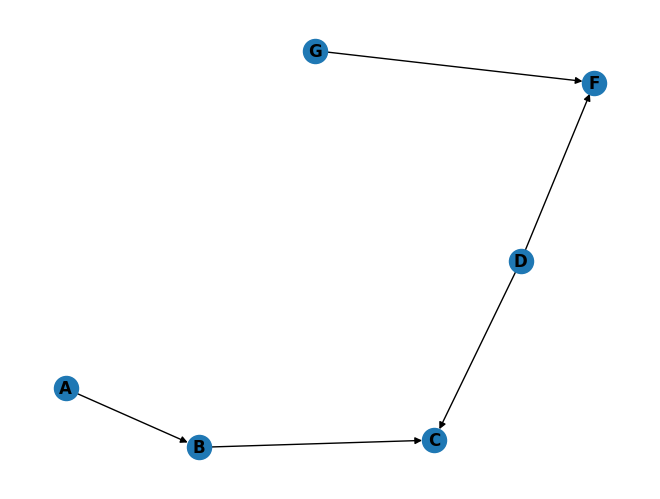

In [ ]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([("A", "B", 4.5),
                            ("B", "C", 0.75),
                            ("D", "F", 2.75),
                            ("D", "C", 2.75),
                            ("G", "F", 0.5)])

nx.draw(DG, with_labels=True, font_weight='bold')

Actualmente los pesos no se ven. Esto es porque manualmente hay que indicarle al grafo que use el peso para algún canal visual. En el siguiente caso, vamos a definir el ancho de la línea como los pesos asociados a cada enlace. Además, vamos a pintar las líneas si su peso es `>2` o n.


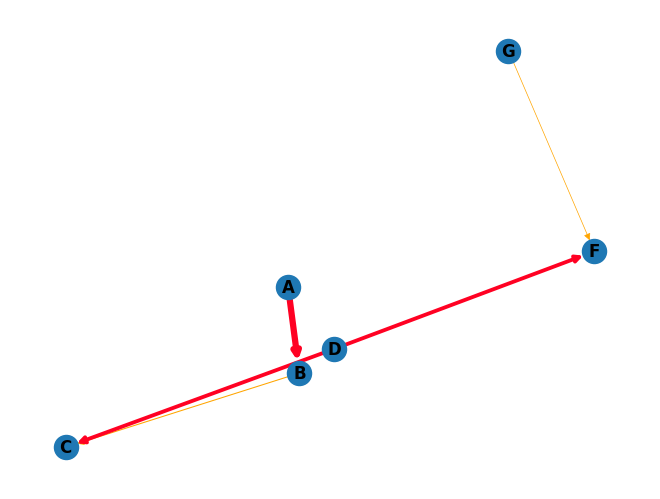

In [ ]:
weights = [x[2] for x in DG.edges.data('weight')]
colors = ["#ff0123" if x > 2 else "orange" for x in weights]
nx.draw(DG, with_labels=True, font_weight='bold', width=weights, edge_color=colors)

### Conservando posición entre un grafo y otro

Cómo habrás notado antes, si ejecutamos 2 veces el método `draw`, ambos dibujarán el grafo de forma distinta. Esto es porque las posiciones son decidas al momento de dibujar. Para evitar esto, uno puede aplicar los _layout_ antes y luego, al momento de dibujar, entregarle las posiciones.

A continuación vamos a hacer 2 dibujos del mismo grafo, pero seteando previamente su posición con estos _layout_.

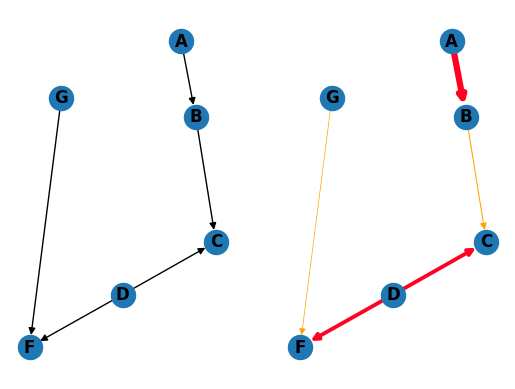

In [ ]:
# Descomentar el layout que querramos ocupar
pos = nx.spring_layout(DG, seed=7)
#pos = nx.shell_layout(DG)
#pos = nx.circular_layout(DG)
#pos = nx.kamada_kawai_layout(DG)

plt.subplot(121)
nx.draw(DG, pos, with_labels=True, font_weight='bold')

plt.subplot(122)
nx.draw(DG, pos, with_labels=True, font_weight='bold', width=weights, edge_color=colors)

plt.show()

¡Ahora si ambos utilizan las mismas posiciones iguales!
**Importante** mucho ojo que al momento de crear el _layout_ y dibujar (`draw(...)`) hay que entregar siempre el mismo grafo.


## Mini ejemplo - Señor de los anillos

Ahora vamos a cargar el _dataset_ del Señor de los Anillos para visualizarlo con esta librería.

Lo primero es usar pandas para cargar el _dataset_

In [ ]:
import pandas as pd

df = pd.read_csv("lotr.csv")
df.head()

,IdSource,IdTarget,Weight
0,frod,sams,533
1,frod,ganda,181
2,merr,pipp,162
3,arag,frod,146
4,frod,goll,127


Ahora crearemos nuestra visualización.
1. Creamos el grafo vacío
2. Seleccionamos solo los personajes cuyo peso sea mayor a 60. Además aprovechamos de calcular el peso total de dichos personajes con `sum`.
3. Llenamos nuestro grafo con la información de los personajes.
4. Obtenemos una lista de los pesos de cada enlace. Estos pesos serán divididos por el total y luego multiplicados por 10. Así nos queda un número entre 0 y 10 para cada enlace.
5. Finalmente dibujamos el grafo. Haremos 2 versiones, una con _layout_ circular y otra que usa simulación de fuerza.




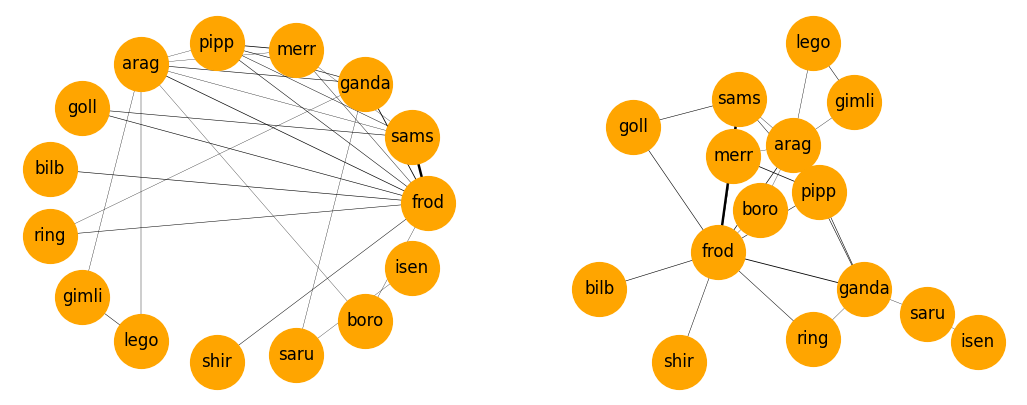

In [ ]:
G_lotr = nx.Graph()

df_filtered = df[df.Weight > 60]
TOTAL = sum(df_filtered.Weight)

G_lotr.add_weighted_edges_from(df_filtered.values)
weights = [(x[2]/TOTAL)*10 for x in G_lotr.edges.data('weight')]


fig, axs = plt.subplots(1, 2, figsize=(13, 5))
options = {
    'node_color': 'orange',
    'node_size': 1500,
    'with_labels': True
}
nx.draw_circular(G_lotr, width=weights, **options, ax=axs[0])
nx.draw_kamada_kawai(G_lotr, width=weights, **options, ax=axs[1])

Ahora haremos el mismo grafo, pero usaremos otro _layout_ y normalizamos los pesos con la fórmula "min-max" para que todos los valores estén entre 0 y 1.


Además, ahora vamos a dibujar el grafo por partes. Primero los nodos, luego los textos y finalmente los enlaces. Para ver que hay más formas de dibujar un grafo sin requerir siempre del método `draw`.

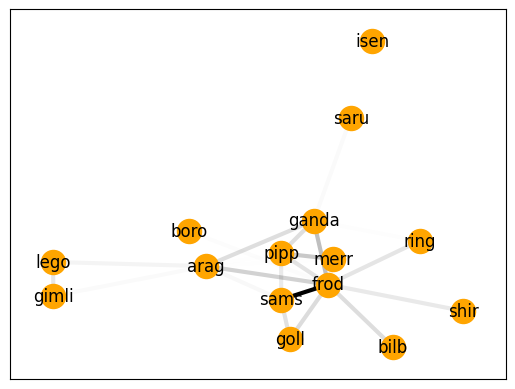

In [ ]:
seed = 4444
pos = nx.spring_layout(G_lotr, seed=seed)

min_weight = min(df_filtered.Weight)
max_weight = max(df_filtered.Weight)
diff = max_weight - min_weight

# Normalizamos 0-1
edge_alphas = [((x[2] - min_weight)/diff) for x in G_lotr.edges.data('weight')]

# Dibujamos por partes el grafo
nx.draw_networkx_nodes(G_lotr, pos, node_color="orange")
nx.draw_networkx_labels(G_lotr, pos)
nx.draw_networkx_edges(G_lotr, pos, width=3, alpha=edge_alphas)
plt.show()

Volveremos a hacer el grafo normalizado, pero esta vez con todos los nodos (sin filtrar por el peso). Además, usaremos matplotlib para definir el tamaño de la imagen final y de quitar el marco de la visualización.

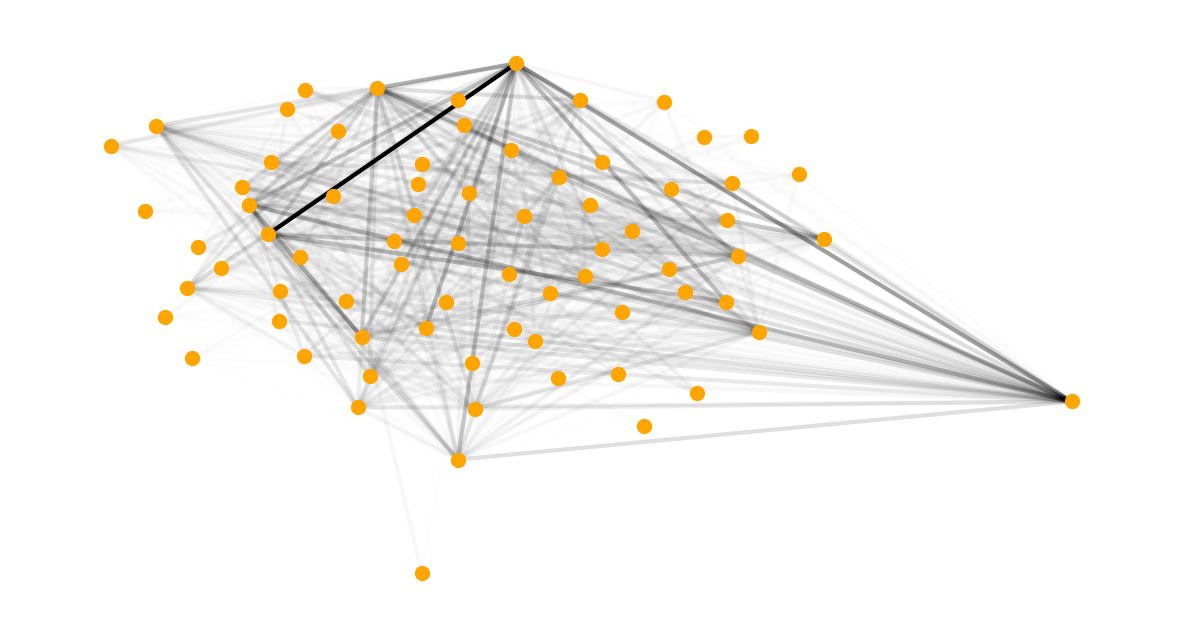

In [ ]:
G_lotr = nx.Graph()
G_lotr.add_weighted_edges_from(df.values)

pos = nx.kamada_kawai_layout(G_lotr)

min_weight = min(df.Weight)
max_weight = max(df.Weight)
diff = max_weight - min_weight

# Normalizamos 0-1
edge_alphas = [((x[2] - min_weight)/diff) for x in G_lotr.edges.data('weight')]

# Definimos el tamaño de la figura a realizar a continuación
plt.figure(figsize=(15, 8))

# Dibujamos por partes el grafo
nx.draw_networkx_nodes(G_lotr, pos, node_color="orange", node_size=100)
nx.draw_networkx_edges(G_lotr, pos, width=3, alpha=edge_alphas)

# Eliminamos los "ejes" que sería el marco de la visualización.
plt.axis("off")
plt.show()

Finalmente, haremos el mismo grafo, pero ahora vamos a cambiar el tamaño del nodo en función de su _betweenness_centrality_. Esta métrica codifica la cantidad de veces que un nodo pertenece a la ruta del "camino más corto" entre otros 2 nodos. Así veremos más grande los nodos que son "más comunes" en el camino más corto.

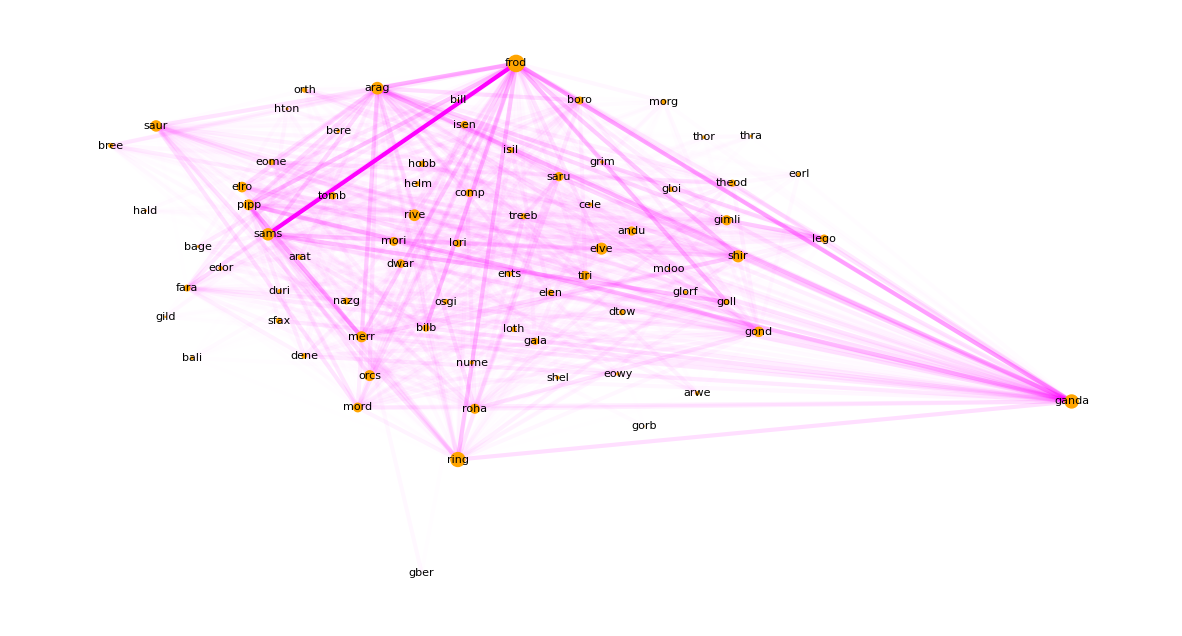

In [ ]:
# Calculamos centralidad
betweenness_centrality = nx.centrality.betweenness_centrality(G_lotr)
node_size = [v * 3500 for v in betweenness_centrality.values()]


# Dibujamos por partes el grafo
plt.figure(figsize=(15, 8))

nx.draw_networkx_nodes(G_lotr, pos, node_color="orange", node_size=node_size)
nx.draw_networkx_labels(G_lotr, pos, font_size=8)
nx.draw_networkx_edges(G_lotr, pos, width=3, alpha=edge_alphas, edge_color="magenta")

plt.axis("off")
plt.show()

## Mini ejemplo - Facebook

Ahora haremos el ejercicio similar, pero con datos de amistades de Facebook.

In [ ]:
facebook = pd.read_csv(
    "facebook.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook.head()

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


En este caso utilizaremos `from_pandas_edgelist` para decirle al grafo que llene su información a partir de un `DataFrame` de `pandas`. A este hay que indicarle qué columna es el nodo de salida del enlace y la columna que representa el nodo de llegada del enlace.

Luego visualizamos con un _layout_ aleatorio los nodos.

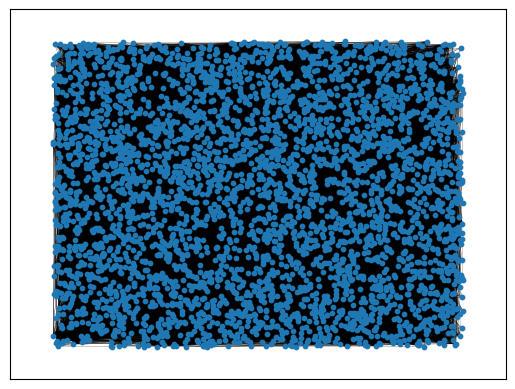

In [ ]:
G_facebook = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G_facebook, pos=nx.random_layout(G_facebook), **plot_options)

Aquí se ve un ejemplo de la importancia de definir una buena posición. Actualmente no se entiende nada, así que usaremos otro _layout_ (`spring_layout`) que está basado en simulación de fuerzas. **Esta celda puede demorar un poco más en ejecutarse porque debe calcular muchas cosas por iteración**.

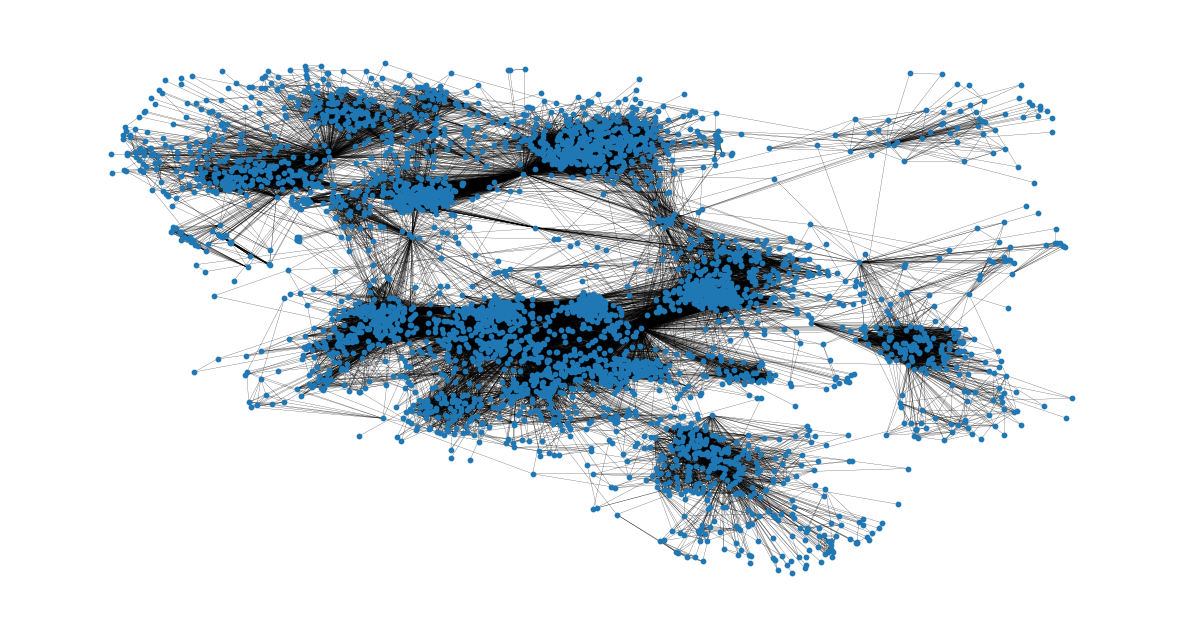

In [ ]:
pos = nx.spring_layout(G_facebook, iterations=15, seed=4444)
plt.figure(figsize=(15, 8))

nx.draw_networkx(G_facebook, pos=pos, **plot_options)
plt.axis("off")
plt.show()

# pyvis

Para finalizar, ahora veremos pyvis. Otra librería en Python para dibujar grafos, solo que estos son interactivos.

Lo primero que haremos es instalar la librería en este colab.

In [ ]:
!pip install pyvis -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.5 MB/s eta 0:00:00


Ahora importamos `network` que nos permitirá crear nuestros grafos. Tambien importamos `display` y `HTML` de `IPython` para poder ver las visualizaciones en el mismo notebook.

In [ ]:
from pyvis import network
import IPython

## Creación de grafo manualmente

Al igual que la librería anterior, esta también permite dibujar a mano cada nodo.


Primero hay crear nuestro grafo con `network.Network(cdn_resources='remote')`. Aqui es importante poner `cdn_resources='remote'` para que funcione en Colab.


Luego llenamos nuestro grafo con nodos y enlaces. En este caso, primero hay que agregar los nodos y luego los enlaces, porque si algún nodo de un enlace no existe, esta librería no los va a crear, sino que lanzará un error.


Finalmente guardamos el grafo en un _html_ y luego visualizamos su contenido. Esta visualización va a permitir _zoom_ al igual que permite seleccionar algún nodo para destacar más sus vecinos.




In [ ]:
net = network.Network(cdn_resources='remote')
net.add_nodes([1, 2, 3, 4],
              value=[10, 100, 400, 10],
              title=['I am node 1', 'node 2 here', 'and im node 3', ''],
              label=['NODE 1', 'NODE 2', 'NODE 3', 'NODE 4'],
              color=['orange', '#162347', '#dd4b39', 'red']
              )

net.add_edge(1, 2, value=20)
net.add_edge(3, 2, value=10)
net.add_edge(1, 3, value=1)
net.add_edge(1, 4, value=1)

# Guardar en HTML y visualizar HTLM
net.save_graph("output.html")
IPython.display.HTML(filename="output.html")

## Integración con Networkx

Una gran ventaja de pyvis es que podemos reutilizar lo visto con la otra librería. Podemos crear un grafo con `Netowrkx` y luego darle ese grafo a `pyvis` para que visualice el grafo interactivo.

### Ejemplo Señor de los Anillos

En este primer ejemplo vamos a cargar el grafo del señor de los anillos.


Vamos a aprovechar pyvis para agregar ciertas interactividades:
* `neighborhood_highlight=True` hace que cuando hagamos click en un nodo, solo los vecinos queden con el color original, los demás se verán grises.
* `select_menu=True` habilita un menú para buscar nodos en el grafo.
* `filter_menu=True` habilita un menú para filtrar elementos en el grafo.




In [ ]:
df = pd.read_csv("lotr.csv")
df_filtered = df[df.Weight > 30]

min_weight = min(df_filtered.Weight)
max_weight = max(df_filtered.Weight)
diff = max_weight - min_weight

# Crear grafo
G_lotr = nx.Graph()
G_lotr.add_weighted_edges_from(df_filtered.values)

# Normalizamos y escalamos el peso para un número entre 1 y 20.
# Este peso luego será usado para definir el ancho de cada enlace.
for nodo_source, nodo_target, atributos in G_lotr.edges(data=True):
    atributos['weight'] = 19 * ((atributos['weight'] - min_weight)/diff) + 1

# Definimos propiedades del nodo como su nombre, el título cundo pase el mouse y su color
for node, attributos in G_lotr.nodes(data=True):
    attributos["label"] = node                  # Texto
    attributos["title"] = "Me llamo " + node    # Tooltip
    attributos["color"] = "orange"              # Color del nodo


# Crear red interactiva con el grafo anterior
# En colab siempre usar cdn_resources='remote'
nt = network.Network(height='400px', width='600px', cdn_resources='remote',
             neighborhood_highlight=True, select_menu=True, filter_menu=True,
             )
# Llenamos el grafo de pyvis con el grafo de networkx
nt.from_nx(G_lotr)

# Guardar en HTML y visualizar HTLM
nt.save_graph("output.html")
IPython.display.HTML(filename="output.html")

Ahora vaoms a apagar ambos menús, pero haremos `nt.show_buttons(filter_=['physics'])` que habilita un menú especial para configurar la simulación de fuerzas en el grafo.

In [ ]:
nt = network.Network(height='400px', width='600px', cdn_resources='remote',
                     neighborhood_highlight=True, select_menu=False,
                     filter_menu=False)

nt.from_nx(G_lotr)
nt.show_buttons(filter_=['physics'])

# Guardar en HTML y visualizar HTLM
nt.save_graph("output.html")
IPython.display.HTML(filename="output.html")

### Ejemplo Juegos de Tronos

En este último ejemplo vamos a cargar el _dataset_ de Juegos de Tronos.

In [ ]:
got_data = pd.read_csv("NetworkOfThrones.csv")
got_data.head()

,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5


In [ ]:
# Crear grafo
got_net = nx.Graph()

min_weight = min(got_data.Weight)
max_weight = max(got_data.Weight)
diff = max_weight - min_weight

# Normalizamos y escalamos el peso para un número entre 1 y 20.
# Este peso luego será usado para definir el ancho de cada enlace.
for index, row in got_data.iterrows():
    src = row["Source"]
    dst = row["Target"]
    w = 19 * (row["Weight"] - min_weight)/diff + 1

    got_net.add_node(src, title=src, label=src)
    got_net.add_node(dst, title=dst, label=src)
    got_net.add_edge(src, dst, weight=w)

# Crear red interactiva con el grafo anterior
# En colab siempre usar cdn_resources='remote'
nt = network.Network(height='600px', width='100%', cdn_resources='remote',
                     neighborhood_highlight=True, select_menu=True,
                     filter_menu=False, bgcolor="#222222", font_color="white")
nt.from_nx(got_net)

# Guardar en HTML y visualizar HTLM
nt.save_graph("output.html")
IPython.display.HTML(filename="output.html")

# Extra: PyNetworkD3 (trabajo en progreso)

Librería en desarrollo como proyecto personal para visualizar grafos utilizando D3.js

In [ ]:
!pip3 install pynetworkd3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 6.0 MB/s eta 0:00:00


In [ ]:
from PyNetworkD3 import ForceGraph, ArcDiagram, AdjacencyMatrix, RadialDiagram

In [ ]:
from networkx.generators.random_graphs import erdos_renyi_graph
from random import randint, choice

n = 20
p = 0.1
g = erdos_renyi_graph(n, p)

dataset = {"nodes": [], "links": []}
for node in g.nodes:
    dataset["nodes"].append({
        "id": node,
        "value": randint(1, 100),
        "cat": choice(["a", "b", "c"])
        })
for edge in g.edges:
    dataset["links"].append({
        "source": edge[0],
        "target": edge[1],
        "value": randint(1, 100),
        "cat": choice(["a", "b", "c"])
        })

In [ ]:
link_kws = {
    "hover": True,
    "hover_rect_color": "#dbdbdb",
    "hover_text_color": "Magenta",
    "tooltip": ["value", "cat"],
    "color_attribute": "cat",
    "color_attribute_type": "categorical",
    "color_scale_type": "pow",
    "color_scheme": None,
    "color_domain_function": [20, 70],
    "color_default": None,
    "color_unknown": None,
}

matrix = AdjacencyMatrix(dataset, size=500, view_box=False, bidirrectional=False,
                         link_kws=link_kws)
matrix

In [ ]:
df = pd.read_csv("lotr.csv")
df = df[df.Weight > 30]

dataset2 = {"nodes": [], "links": []}
nodes = set()
for index, row in df.iterrows():
    nodes.add(row.IdSource)
    nodes.add(row.IdTarget)

    dataset2["links"].append({
        "source": row.IdSource,
        "target": row.IdTarget,
        "value": row.Weight,
        })
for node in nodes:
    dataset2["nodes"].append({"id": node})

In [ ]:
dataset2["nodes"][:6], dataset2["links"][9]

([{'id': 'tiri'},
  {'id': 'pipp'},
  {'id': 'comp'},
  {'id': 'theod'},
  {'id': 'bilb'},
  {'id': 'merr'}],
 {'source': 'frod', 'target': 'pipp', 'value': 115})

In [ ]:
legend_kws = {
    "show": True,
    "scale_size": 0.7,
    "color_source_hovered": "red",
    "color_target_hovered": "blue"
}

node_kws = {
    "hover": True,
    "tooltip": ["id"],
    "size_default": 5,
}

arc = ArcDiagram(dataset2, width=1000, legend_kws=legend_kws, node_kws=node_kws)
arc

In [ ]:
matrix = AdjacencyMatrix(dataset2, size=800, bidirrectional=False)
matrix

In [ ]:
radial = RadialDiagram(dataset2, size=900, view_box=False)
radial